# Clustering algorithms

## Creating synthetic datasets
Until now, we have only used **real** datasets to test our algorithms. Another possibility is to create *synthetic* datasets to test the behavior of different algorithms whenever facing controlled situations. 

Sklearn offers different functions using the `datasets` package to generate random samples (see https://scikit-learn.org/stable/modules/classes.html#samples-generator).

In [12]:
from sklearn.datasets import make_circles, make_moons, make_blobs
import numpy as np
from matplotlib import pyplot as plt

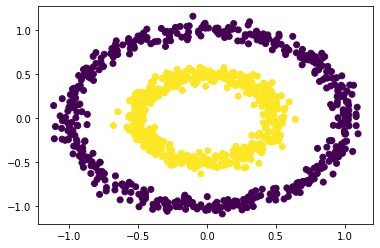

In [24]:
n_samples=1000
X_noisy_circles, y_noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(X_noisy_circles[:,0], X_noisy_circles[:,1], c=y_noisy_circles)

In [27]:
random_dataset = np.random.rand(n_samples, 2)

**Questions**

1. Create 1 additional dataset using the function `noisy_moons`. You now have 3 datasets to work with with 1000 individuals each.
2. Plot each of the dataset in 2 dimensions and color it according to its class (the second member of the tuple).

## K-Means

**Questions**:
1. Use the class `KMeans` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) to perform a k-means with k=3 on the 3 datasets. 
2. Perform an elbow plot plotting with the y-axis representing the sum of the variance for each cluster and the x-axis the number of clusters (information is stored within the `inertia_` attribute of the class) and select the best value of $k$ for each dataset.
3. Plot each dataset and color the individuals according to their assigned cluster.

## HAC
**Questions**:
1. Use the class `AgglomerativeClustering` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) to perform a HAC using `Ward` linkage and the `euclidean` distance as a starting point on each dataset.
2. Use the function `plot_dendogram` below to plot one dendrogram per dataset and conclude on the optimal number of $k$ per dataset (see here on how to use this function: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).
3. Plot each dataset and color the individuals according to their assigned cluster.

In [29]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## DBScan

1. Use the class `DBScan` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) to perform clustering using the `DBScan` algorithm on each dataset. What is the number of clusters ? Does it match the reality of the dataset ?
2. Test different values of `eps`, `min_samples` and `metrics`.
3. Suggest a solution to select the best values for the hyperparameters.
4. Plot each dataset and color the individuals according to their assigned cluster.

## Compare each algorithm

For each of the datasets and the algorithms we have tested:
1. Propose a method to test the relevance of the algorithm for the clustering problem.
2. Apply this method to each problem.
3. What is the best performing algorithm for each problem ? Can you explain it ?